# Christian Argueta and Brady Dunne
# Dr. Murray
# Faraday Lab

# Reading in the data and importing the necessary libraries

In [799]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from scipy.stats import chi2

In [800]:
df = pd.read_csv('Lab 4 Python Data - Sheet1.csv')

In [801]:
#Assigning variables to the data

angle1 = df['Angle1']
angle2 = df['Angle2']
angle3 = df['Angle3']
angle4 = df['Angle4']
angle5 = df['Angle5']
angle6 = df['Angle6']
angle7 = df['Angle7']
angle8 = df['Angle8']
angle9 = df['Angle9']
angle10 = df['Angle10']
angle11 = df['Angle11']
angle12 = df['Angle12']
angle13 = df['Angle13']
angle14 = df['Angle14']
angle15 = df['Angle15']
angle16 = df['Angle16']
angle17 = df['Angle17']
angle18 = df['Angle18']
angle19= df['Angle19']
angle20 = df['Angle20']

Voltage1 = df['Volts (mV)1']
Voltage2 = df['Volts (mV)2']
Voltage3 = df['Volts (mV)3']
Voltage4 = df['Volts (mV)4']
Voltage5 = df['Volts (mV)5']
Voltage6 = df['Volts (mV)6']
Voltage7 = df['Volts (mV)7']
Voltage8 = df['Volts (mV)8']
Voltage9 = df['Volts (mV)9']
Voltage10 = df['Volts (mV)10']
Voltage11 = df['Volts (mV)11']
Voltage12 = df['Volts (mV)12']
Voltage13 = df['Volts (mV)13']
Voltage14 = df['Volts (mV)14']
Voltage15 = df['Volts (mV)15']
Voltage16 = df['Volts (mV)16']
Voltage17 = df['Volts (mV)17']
Voltage18 = df['Volts (mV)18']
Voltage19 = df['Volts (mV)19']
Voltage20 = df['Volts (mV)20']



#Creating a list of the angles and voltages

angles = [angle1, angle2, angle3, angle4, angle5, angle6, angle7, angle8, angle9, angle10, angle11, angle12, angle13, angle14, angle15, angle16, angle17, angle18]
voltages = [Voltage1, Voltage2, Voltage3, Voltage4, Voltage5, Voltage6, Voltage7, Voltage8, Voltage9, Voltage10, Voltage11, Voltage12, Voltage13, Voltage14, Voltage15, Voltage16, Voltage17, Voltage18]


# Let's first plot the polycarbonate data

# Input: 3.01V and 1.12 Amps + Reversed

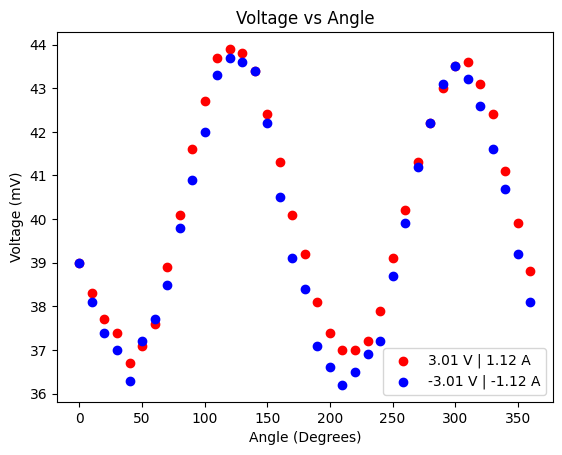

In [802]:
#Plotting the data
plt.scatter(angle1, Voltage1 , color = 'red', label = '3.01 V | 1.12 A')
plt.scatter(angle2, Voltage2 , color = 'blue', label = '-3.01 V | -1.12 A')

plt.xlabel('Angle (Degrees)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage vs Angle')
plt.legend()
plt.show()

# Input: 0 v and 0.00 Amps

Text(0.5, 1.0, 'Voltage vs Angle')

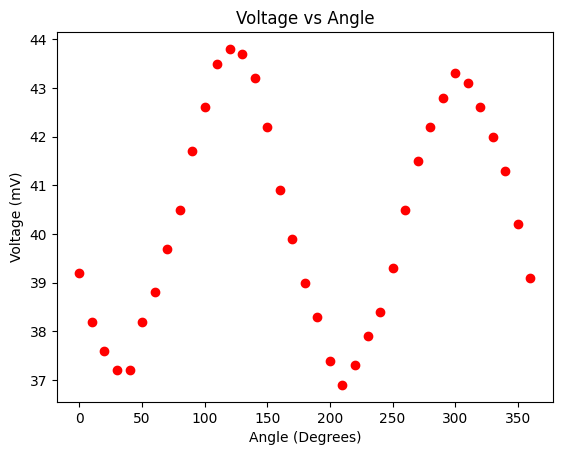

In [803]:
plt.scatter(angle3, Voltage3 , color = 'red', label = '0 mV | 0 A')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage vs Angle')

# Input 5.23 V 1.99 Amps + Reversed

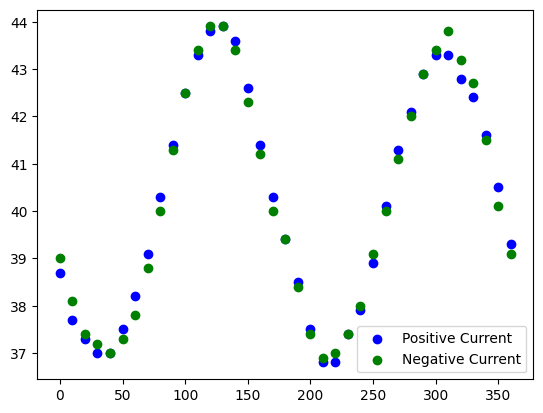

In [804]:
plt.scatter(angle4, Voltage4 , color = 'blue', label = 'Positive Current')
plt.scatter(angle5, Voltage5 , color = 'green', label = 'Negative Current')

plt.legend()
plt.show()

# So you get the idea. Now I'll plot all of them 

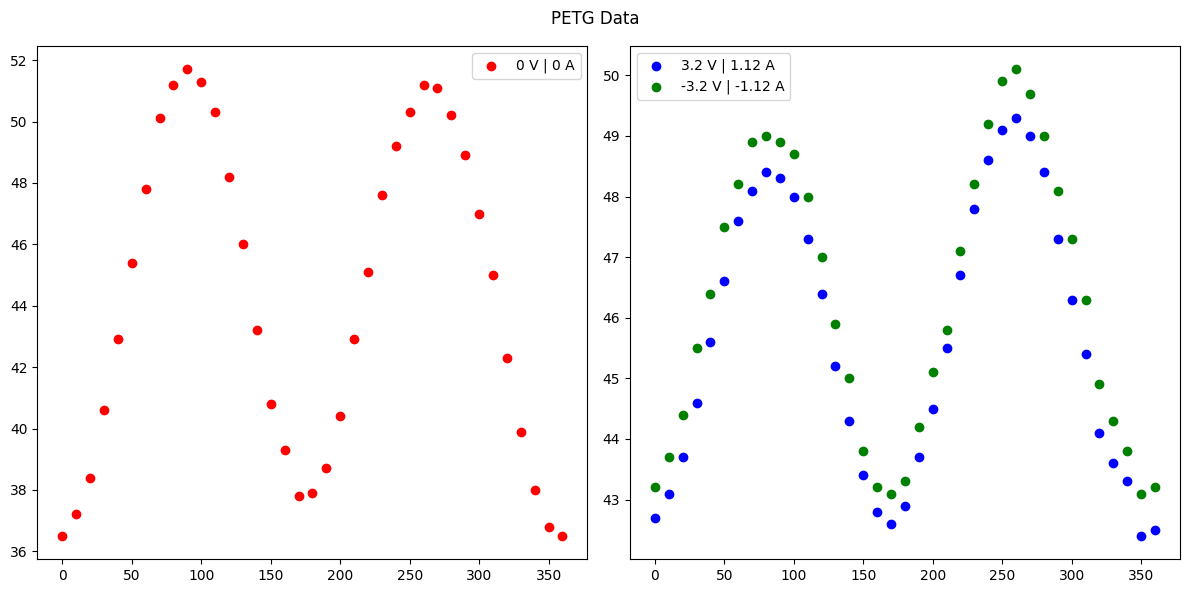

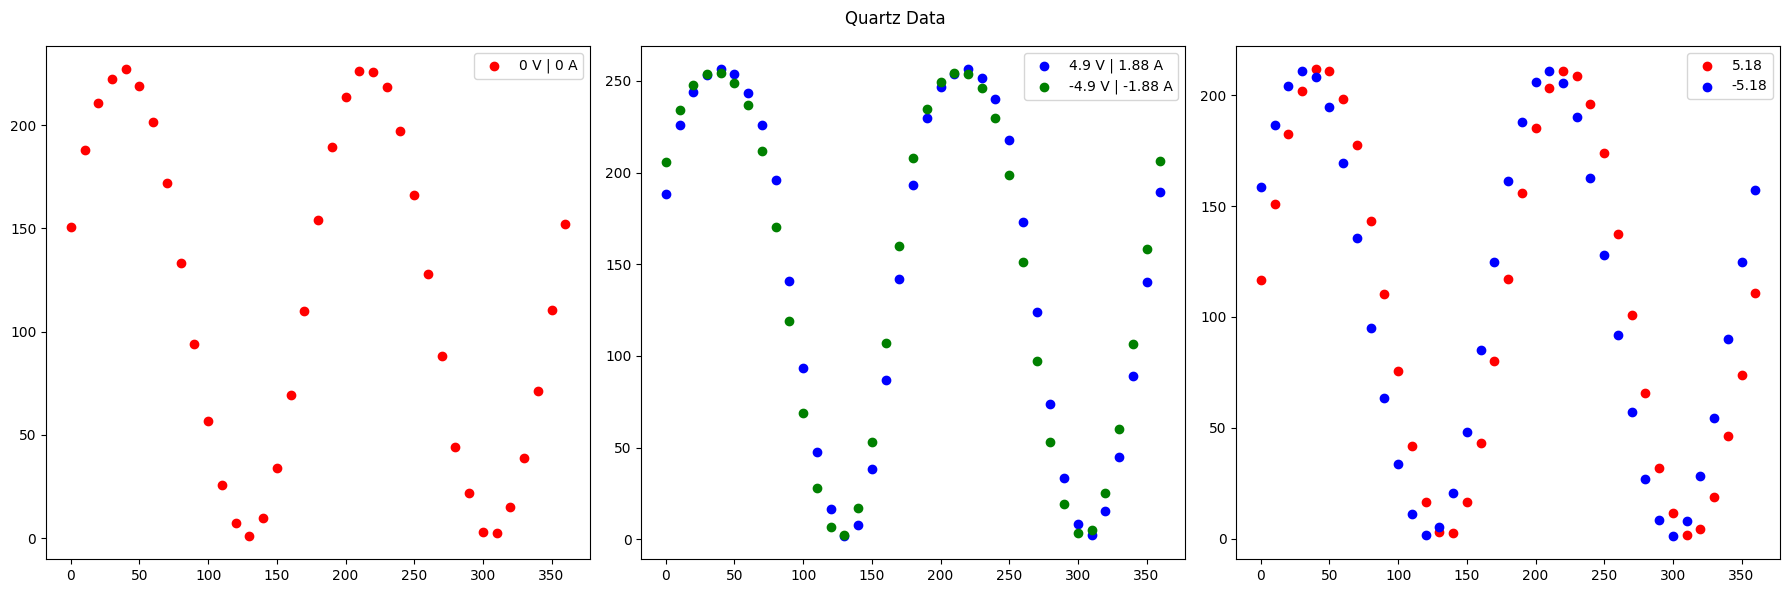

In [805]:
#plot the rest of the data on a 1 x 2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Increase the figsize parameter to make the plots larger
fig.suptitle('PETG Data')
axs[0].scatter(angle6, Voltage6 , color = 'red', label = '0 V | 0 A')
axs[0].legend()

axs[1].scatter(angle7, Voltage7 , color = 'blue', label = '3.2 V | 1.12 A')
axs[1].scatter(angle8, Voltage8 , color = 'green', label = '-3.2 V | -1.12 A')
axs[1].legend()

plt.tight_layout()
plt.show()

#Plot the other ones on a 1 x 3 grid
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Increase the figsize parameter to make the plots larger
fig.suptitle('Quartz Data')
axs[0].scatter(angle9, Voltage9 , color = 'red', label = '0 V | 0 A')
axs[0].legend()

axs[1].scatter(angle10, Voltage10 , color = 'blue', label = '4.9 V | 1.88 A')
axs[1].scatter(angle11, Voltage11 , color = 'green', label = '-4.9 V | -1.88 A')
axs[1].legend()

axs[2].scatter(angle12, Voltage12 , color = 'red', label = '5.18')
axs[2].scatter(angle13, Voltage13 , color = 'blue', label = '-5.18')
axs[2].legend()

plt.tight_layout()
plt.show()

# Lets do the quartz fitting

In [806]:
# Normalize the voltages
Voltage12 = Voltage12 / np.max(Voltage12) if np.max(Voltage12) != 0 else Voltage12
Voltage13 = Voltage13 / np.max(Voltage13) if np.max(Voltage13) != 0 else Voltage13
Voltage9 = Voltage9 / np.max(Voltage9) if np.max(Voltage9) != 0 else Voltage9

#Convert the angles to radians
angle12 = np.radians(angle12)
angle13 = np.radians(angle13)
angle9 = np.radians(angle9)

#Error bars
errorx_degrees = 3
errory = 0.02
errorx_radians = np.radians(errorx_degrees)

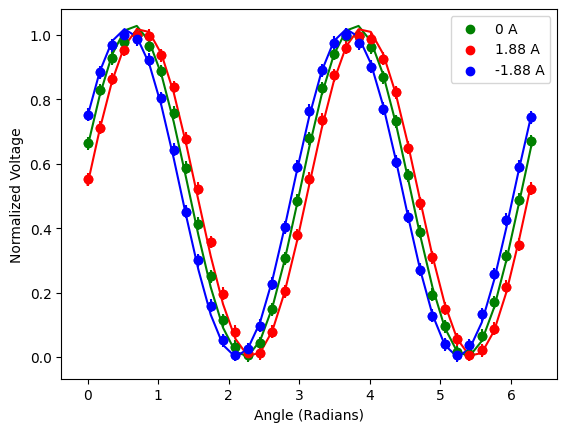

In [807]:
# Creating a function to fit the data cos^2(theta - phi)
def cos_sq(x, a, b):
    return a * (np.cos(x - b))**2

# Take in guesses for the parameters
guess = [1, 0]  # Initial guesses for parameters a and b


# Fitting the data using the guesses
popt, pcov = curve_fit(cos_sq, angle12, Voltage12, p0=guess)
popt2, pcov2 = curve_fit(cos_sq, angle13, Voltage13, p0=guess)
popt3, pcov3 = curve_fit(cos_sq, angle9, Voltage9, p0=guess)

# Plotting the data
plt.scatter(angle9, Voltage9, color='green', label='0 A')
plt.scatter(angle12, Voltage12, color='red', label='1.88 A')
plt.scatter(angle13, Voltage13, color='blue', label='-1.88 A')
plt.errorbar(angle9, Voltage9, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
plt.errorbar(angle12, Voltage12, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.errorbar(angle13, Voltage13, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')

plt.plot(angle9, cos_sq(angle9, *popt3), 'g-')
plt.plot(angle12, cos_sq(angle12, *popt), 'r-')
plt.plot(angle13, cos_sq(angle13, *popt2), 'b-')

plt.xlabel('Angle (Radians)')
plt.ylabel('Normalized Voltage')
plt.legend()
plt.show()

In [808]:
#Calculate the residuals and chi squared
residuals = Voltage12 - cos_sq(angle12, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Voltage12 - np.mean(Voltage12))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R^2 for the first data set: ', r_squared)

residuals2 = Voltage13 - cos_sq(angle13, *popt2)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((Voltage13 - np.mean(Voltage13))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)
print('R^2 for the second data set: ', r_squared2)

residuals3 = Voltage9 - cos_sq(angle9, *popt3)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((Voltage9 - np.mean(Voltage9))**2)
r_squared3 = 1 - (ss_res3 / ss_tot3)
print('R^2 for the third data set: ', r_squared3)

#Calculate the chi squared
chi_squared = np.sum((residuals / errory)**2)
chi_squared2 = np.sum((residuals2 / errory)**2)
chi_squared3 = np.sum((residuals3 / errory)**2)

print('Chi squared for the first data set: ', chi_squared)
print('Chi squared for the second data set: ', chi_squared2)
print('Chi squared for the third data set: ', chi_squared3)

#Calculate the degrees of freedom
dof = len(angle12) - 2
dof2 = len(angle13) - 2
dof3 = len(angle9) - 2

print('Degrees of freedom for the first data set: ', dof)
print('Degrees of freedom for the second data set: ', dof2)
print('Degrees of freedom for the third data set: ', dof3)

R^2 for the first data set:  0.9977092255523226
R^2 for the second data set:  0.9983021917284758
R^2 for the third data set:  0.9971896024914714
Chi squared for the first data set:  26.09706033869227
Chi squared for the second data set:  19.41676274273576
Chi squared for the third data set:  32.398493250804655
Degrees of freedom for the first data set:  35
Degrees of freedom for the second data set:  35
Degrees of freedom for the third data set:  35


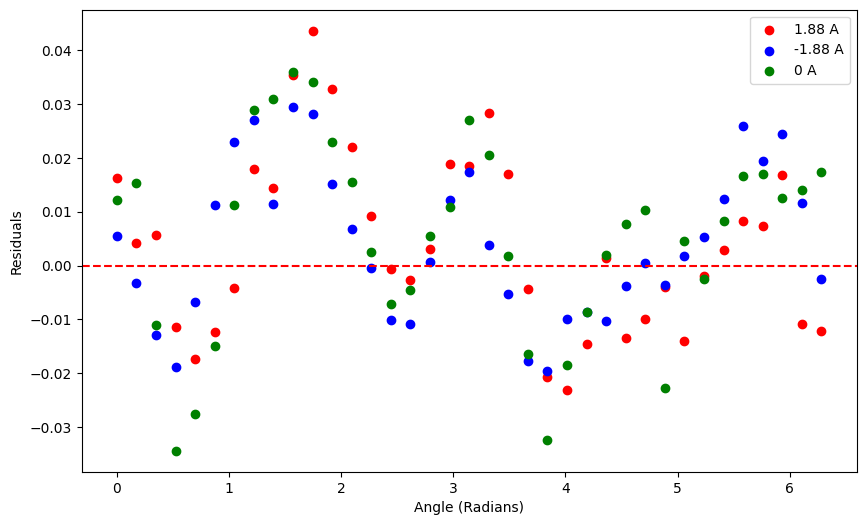

In [809]:
#Figure size
fig = plt.figure(figsize=(10, 6))

#Plot the residuals
plt.scatter(angle12, residuals, color='red', label='1.88 A')
plt.scatter(angle13, residuals2, color='blue', label='-1.88 A')
plt.scatter(angle9, residuals3, color='green', label='0 A')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Angle (Radians)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

The phase difference between the first and second data sets is 0.2195033318668166 radians or 12.57661450502806 degrees with an error of ±0.005145446942252005 radians or ±0.29481239349953453 degrees
The phase difference between the first and third data sets is 0.11065871511362757 radians or 6.340277342351396 degrees with an error of ±0.0057902966953262145 radians or ±0.33175956277074 degrees
The phase difference between the second and third data sets is -0.10884461675318902 radians or -6.236337162676664 degrees with an error of ±0.005466464926759817 radians or ±0.3132053691596282 degrees


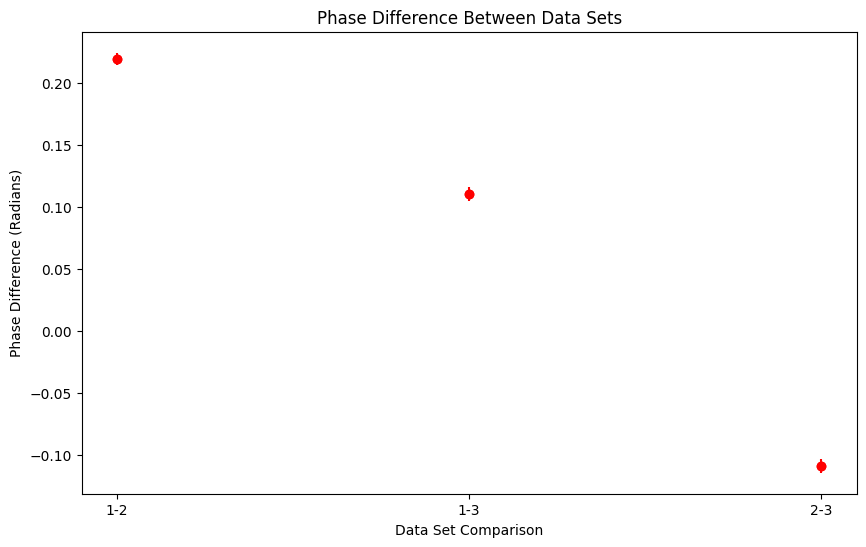

In [810]:
# Calculate the phase shifts in radians and degrees
phase_diff1_rad = popt[1] - popt2[1]
phase_diff2_rad = popt[1] - popt3[1]
phase_diff3_rad =popt2[1] - popt3[1]

phase_diff1_deg = np.degrees(phase_diff1_rad)
phase_diff2_deg = np.degrees(phase_diff2_rad)
phase_diff3_deg = np.degrees(phase_diff3_rad)

sigma_b1 = np.sqrt(pcov[1][1])  # Error in parameter b from first fit
sigma_b2 = np.sqrt(pcov2[1][1])  # Error in parameter b from second fit
sigma_b3 = np.sqrt(pcov3[1][1])  # Error in parameter b from third fit

# Error propagation for the phase differences
sigma_phase_diff1_rad = np.sqrt(sigma_b1**2 + sigma_b2**2)
sigma_phase_diff2_rad = np.sqrt(sigma_b1**2 + sigma_b3**2)
sigma_phase_diff3_rad = np.sqrt(sigma_b2**2 + sigma_b3**2)

# Converting errors from radians to degrees
sigma_phase_diff1_deg = np.degrees(sigma_phase_diff1_rad)
sigma_phase_diff2_deg = np.degrees(sigma_phase_diff2_rad)
sigma_phase_diff3_deg = np.degrees(sigma_phase_diff3_rad)

# Print the phase shifts and their errors
print(f'The phase difference between the first and second data sets is {phase_diff1_rad} radians or {phase_diff1_deg} degrees with an error of ±{sigma_phase_diff1_rad} radians or ±{sigma_phase_diff1_deg} degrees')
print(f'The phase difference between the first and third data sets is {phase_diff2_rad} radians or {phase_diff2_deg} degrees with an error of ±{sigma_phase_diff2_rad} radians or ±{sigma_phase_diff2_deg} degrees')
print(f'The phase difference between the second and third data sets is {phase_diff3_rad} radians or {phase_diff3_deg} degrees with an error of ±{sigma_phase_diff3_rad} radians or ±{sigma_phase_diff3_deg} degrees')

#Plot the phase shifts 
fig = plt.figure(figsize=(10, 6))
plt.scatter([1, 2, 3], [phase_diff1_rad, phase_diff2_rad, phase_diff3_rad], color='red')
plt.errorbar([1, 2, 3], [phase_diff1_rad, phase_diff2_rad, phase_diff3_rad], yerr=[sigma_phase_diff1_rad, sigma_phase_diff2_rad, sigma_phase_diff3_rad], fmt='o', color='red')
plt.xticks([1, 2, 3], ['1-2', '1-3', '2-3'])
plt.xlabel('Data Set Comparison')
plt.ylabel('Phase Difference (Radians)')
plt.title('Phase Difference Between Data Sets')
plt.show()

# Polycarbonate

In [811]:
# Normalize the voltages to the range [0, 1]
Voltage1 = (Voltage1 - np.min(Voltage1)) / (np.max(Voltage1) - np.min(Voltage1)) if np.max(Voltage1) != np.min(Voltage1) else Voltage1
Voltage2 = (Voltage2 - np.min(Voltage2)) / (np.max(Voltage2) - np.min(Voltage2)) if np.max(Voltage2) != np.min(Voltage2) else Voltage2
Voltage3 = (Voltage3 - np.min(Voltage3)) / (np.max(Voltage3) - np.min(Voltage3)) if np.max(Voltage3) != np.min(Voltage3) else Voltage3

# Convert the angles to radians
angle1 = np.radians(angle1)
angle2 = np.radians(angle2)
angle3 = np.radians(angle3)


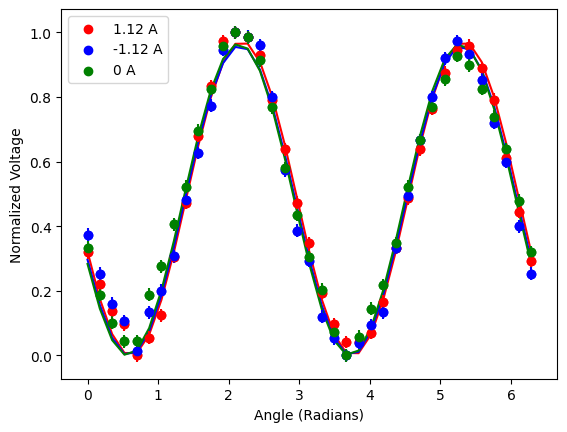

In [812]:
# Creating a function to fit the data cos^2(theta - phi)
def cos_sq(x, a, b):
    return a * (np.cos(x - b))**2

# Take in better guesses for the parameters based on visual inspection or prior knowledge
guess = [1, 0]  # Adjusted initial guesses for parameters a and b

# Fitting the data using the guesses with increased maxfev
popt4, pcov4 = curve_fit(cos_sq, angle1, Voltage1, p0=guess, maxfev=10000)
popt5, pcov5 = curve_fit(cos_sq, angle2, Voltage2, p0=guess, maxfev=10000)
popt6, pcov6 = curve_fit(cos_sq, angle3, Voltage3, p0=guess, maxfev=10000)

# Plotting the data
plt.scatter(angle1, Voltage1, color='red', label='1.12 A')
plt.scatter(angle2, Voltage2, color='blue', label='-1.12 A')
plt.scatter(angle3, Voltage3, color='green', label='0 A')

plt.plot(angle1, cos_sq(angle1, *popt4), 'r-')
plt.plot(angle2, cos_sq(angle2, *popt5), 'b-')
plt.plot(angle3, cos_sq(angle3, *popt6), 'g-')
plt.errorbar(angle1, Voltage1, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.errorbar(angle2, Voltage2, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
plt.errorbar(angle3, Voltage3, xerr=errorx_radians, yerr=errory, fmt='o', color='green')

plt.xlabel('Angle (Radians)')
plt.ylabel('Normalized Voltage')
plt.legend()
plt.show()

R^2 for the first data set:  0.9903183489394285
R^2 for the second data set:  0.9804344132375129
R^2 for the third data set:  0.983029355293717
Chi squared for the first data set:  99.78019377858303
Chi squared for the second data set:  198.80375313954687
Chi squared for the third data set:  157.61359706676873
Degrees of freedom for the first data set:  35
Degrees of freedom for the second data set:  35
Degrees of freedom for the third data set:  35


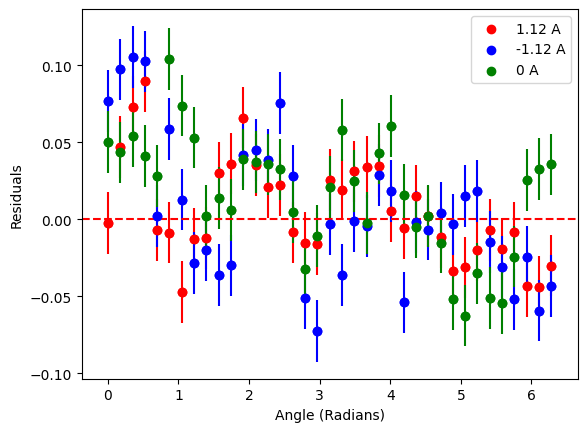

The phase difference between the first and second data sets is 0.023281729747717472 radians or 1.33394485430839 degrees with an error of ±0.013960699801978985 radians or ±0.79988917770252 degrees
The phase difference between the first and third data sets is 0.04037740496716247 radians or 2.3134548923089757 degrees with an error of ±0.012909889738512944 radians or ±0.7396821959960417 degrees
The phase difference between the second and third data sets is 0.017095675219444995 radians or 0.9795100380005857 degrees with an error of ±0.015289852246785253 radians or ±0.8760440031194142 degrees


In [813]:
#Making a residual plot
residuals4 = Voltage1 - cos_sq(angle1, *popt4)
ss_res4 = np.sum(residuals4**2)
ss_tot4 = np.sum((Voltage1 - np.mean(Voltage1))**2)
r_squared4 = 1 - (ss_res4 / ss_tot4)
print('R^2 for the first data set: ', r_squared4)

residuals5 = Voltage2 - cos_sq(angle2, *popt5)
ss_res5 = np.sum(residuals5**2) 
ss_tot5 = np.sum((Voltage2 - np.mean(Voltage2))**2)
r_squared5 = 1 - (ss_res5 / ss_tot5)
print('R^2 for the second data set: ', r_squared5)

residuals6 = Voltage3 - cos_sq(angle3, *popt6)
ss_res6 = np.sum(residuals6**2)
ss_tot6 = np.sum((Voltage3 - np.mean(Voltage3))**2)
r_squared6 = 1 - (ss_res6 / ss_tot6)
print('R^2 for the third data set: ', r_squared6)

#Calculate the chi squared
chi_squared4 = np.sum((residuals4 / errory)**2)
chi_squared5 = np.sum((residuals5 / errory)**2)
chi_squared6 = np.sum((residuals6 / errory)**2)

print('Chi squared for the first data set: ', chi_squared4)
print('Chi squared for the second data set: ', chi_squared5)
print('Chi squared for the third data set: ', chi_squared6)

#Calculate the degrees of freedom
dof4 = len(angle1) - 2
dof5 = len(angle2) - 2
dof6 = len(angle3) - 2
print('Degrees of freedom for the first data set: ', dof4)
print('Degrees of freedom for the second data set: ', dof5)
print('Degrees of freedom for the third data set: ', dof6)
#Plot the residuals
plt.scatter(angle1, residuals4, color='red', label='1.12 A')
plt.errorbar(angle1, residuals4, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.scatter(angle2, residuals5, color='blue', label='-1.12 A')
plt.errorbar(angle2, residuals5, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
plt.scatter(angle3, residuals6, color='green', label='0 A')
plt.errorbar(angle3, residuals6, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Angle (Radians)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Calculate the phase shifts in radians and degrees
phase_diff4_rad = popt4[1] - popt5[1]
phase_diff5_rad = popt4[1] - popt6[1]
phase_diff6_rad = popt5[1] - popt6[1]

phase_diff4_deg = np.degrees(phase_diff4_rad)
phase_diff5_deg = np.degrees(phase_diff5_rad)
phase_diff6_deg = np.degrees(phase_diff6_rad)

sigma_b4 = np.sqrt(pcov4[1][1])  # Error in parameter b from first fit
sigma_b5 = np.sqrt(pcov5[1][1])  # Error in parameter b from second fit
sigma_b6 = np.sqrt(pcov6[1][1])  # Error in parameter b from third fit

# Error propagation for the phase differences
sigma_phase_diff4_rad = np.sqrt(sigma_b4**2 + sigma_b5**2)
sigma_phase_diff5_rad = np.sqrt(sigma_b4**2 + sigma_b6**2)
sigma_phase_diff6_rad = np.sqrt(sigma_b5**2 + sigma_b6**2)

# Converting errors from radians to degrees
sigma_phase_diff4_deg = np.degrees(sigma_phase_diff4_rad)
sigma_phase_diff5_deg = np.degrees(sigma_phase_diff5_rad)
sigma_phase_diff6_deg = np.degrees(sigma_phase_diff6_rad)

# Print the phase shifts and their errors
print(f'The phase difference between the first and second data sets is {phase_diff4_rad} radians or {phase_diff4_deg} degrees with an error of ±{sigma_phase_diff4_rad} radians or ±{sigma_phase_diff4_deg} degrees')
print(f'The phase difference between the first and third data sets is {phase_diff5_rad} radians or {phase_diff5_deg} degrees with an error of ±{sigma_phase_diff5_rad} radians or ±{sigma_phase_diff5_deg} degrees')
print(f'The phase difference between the second and third data sets is {phase_diff6_rad} radians or {phase_diff6_deg} degrees with an error of ±{sigma_phase_diff6_rad} radians or ±{sigma_phase_diff6_deg} degrees')

# Plotting them on one graph

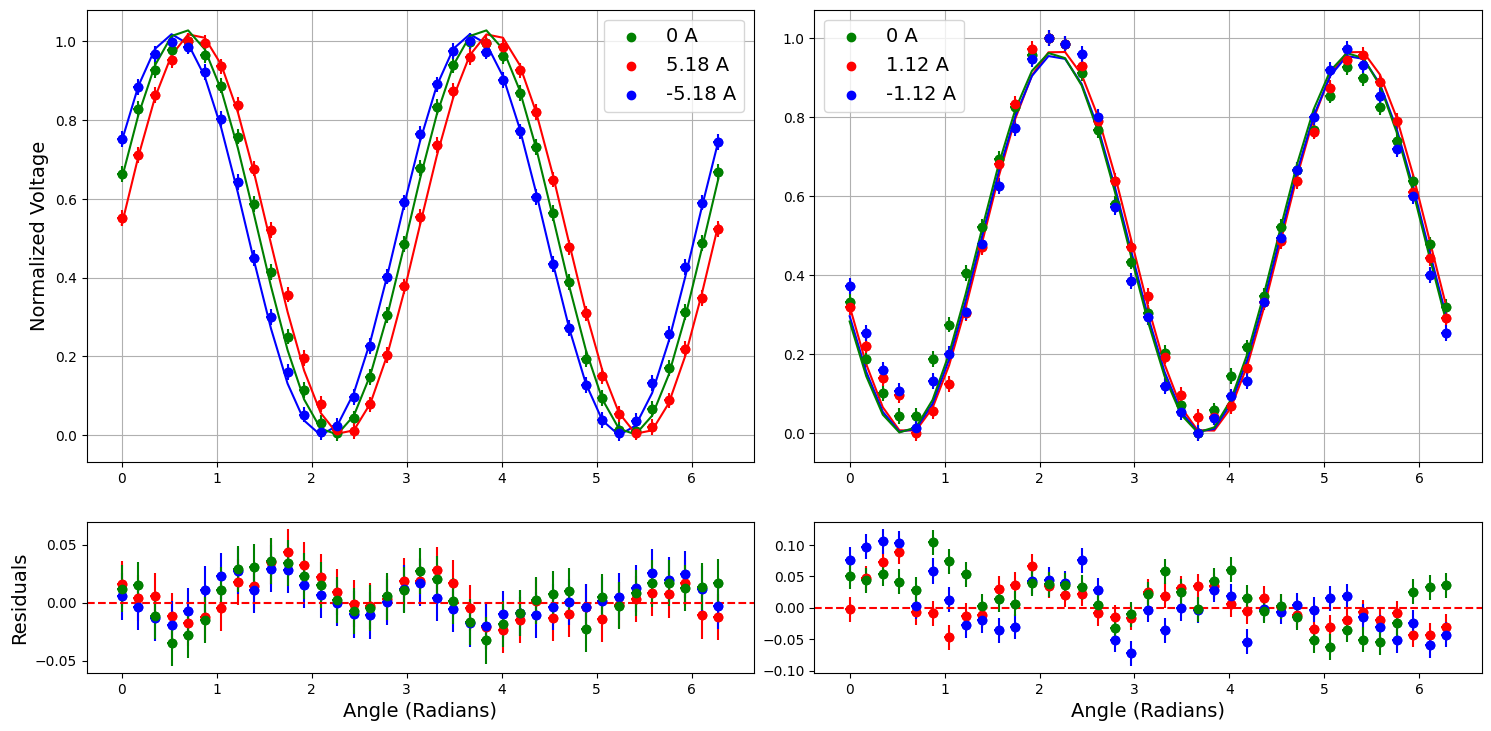

In [814]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Creating the figure and defining the GridSpec layout
fig = plt.figure(figsize=(18, 18))  # Adjust the figure size as needed
gs = gridspec.GridSpec(4, 4, height_ratios=[3, 1, 3, 1])  # GridSpec with 4 rows and 4 columns

# First main voltage vs angle plot (top left quadrant)
ax1 = fig.add_subplot(gs[0, :2])  # Spanning first row and first two columns
ax1.scatter(angle9, Voltage9, color='green', label='0 A')
ax1.errorbar(angle9, Voltage9, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
ax1.scatter(angle12, Voltage12, color='red', label='5.18 A')
ax1.errorbar(angle12, Voltage12, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
ax1.scatter(angle13, Voltage13, color='blue', label='-5.18 A')
ax1.errorbar(angle13, Voltage13, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
ax1.plot(angle13, cos_sq(angle13, *popt2), 'b-')
ax1.plot(angle12, cos_sq(angle12, *popt), 'r-')
ax1.plot(angle9, cos_sq(angle9, *popt3), 'g-')

ax1.set_ylabel('Normalized Voltage', fontsize=14)
ax1.legend(fontsize=14)
ax1.grid(True)

# First residuals plot (directly below the first main plot)
ax2 = fig.add_subplot(gs[1, :2])  # Spanning second row and first two columns
ax2.scatter(angle12, residuals, color='red', label='5.18 A')
ax2.errorbar(angle12, residuals, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
ax2.scatter(angle13, residuals2, color='blue', label='-5.18 A')
ax2.errorbar(angle13, residuals2, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
ax2.scatter(angle9, residuals3, color='green', label='0 A')
ax2.errorbar(angle9, residuals3, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Angle (Radians)', fontsize=14)
ax2.set_ylabel('Residuals', fontsize=14)


# Second main voltage vs angle plot (top right quadrant)
ax3 = fig.add_subplot(gs[0, 2:])  # Spanning first row and last two columns
ax3.scatter(angle3, Voltage3, color='green', label='0 A')
ax3.errorbar(angle3, Voltage3, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
ax3.scatter(angle1, Voltage1, color='red', label='1.12 A')
ax3.errorbar(angle1, Voltage1, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
ax3.scatter(angle2, Voltage2, color='blue', label='-1.12 A')
ax3.errorbar(angle2, Voltage2, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')

ax3.plot(angle1, cos_sq(angle1, *popt4), 'r-')
ax3.plot(angle2, cos_sq(angle2, *popt5), 'b-')
ax3.plot(angle3, cos_sq(angle3, *popt6), 'g-')


ax3.legend(fontsize=14)
ax3.grid(True)

# Second residuals plot
ax4 = fig.add_subplot(gs[1, 2:]) 
ax4.scatter(angle1, residuals4, color='red', label='1.12 A')
ax4.errorbar(angle1, residuals4, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
ax4.scatter(angle2, residuals5, color='blue', label='-1.12 A')
ax4.errorbar(angle2, residuals5, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
ax4.scatter(angle3, residuals6, color='green', label='0 A')
ax4.errorbar(angle3, residuals6, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
ax4.axhline(y=0, color='r', linestyle='--')
ax4.set_xlabel('Angle (Radians)', fontsize=14)

#Save the figure as a pdf
plt.savefig('Lab4_Figure.pdf')
plt.show()


# Now for the PETG

In [815]:
#Normalize the voltage

Voltage6 = (Voltage6 - np.min(Voltage6)) / (np.max(Voltage6) - np.min(Voltage6))
Voltage7 = (Voltage7 - np.min(Voltage7)) / (np.max(Voltage7) - np.min(Voltage7))
Voltage8 = (Voltage8 - np.min(Voltage8)) / (np.max(Voltage8) - np.min(Voltage8))

#Convert the angles to radians
angle6 = np.radians(angle6)
angle7 = np.radians(angle7)
angle8 = np.radians(angle8)


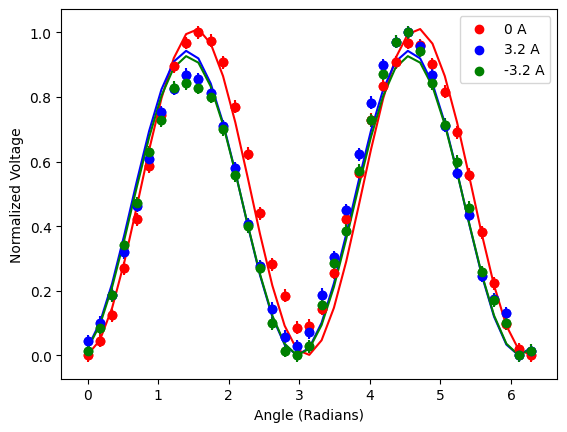

R^2 for the first data set:  0.9721788233970304
R^2 for the second data set:  0.9722473568190253
R^2 for the third data set:  0.981113496333283
Chi squared for the first data set:  299.14840168943414
Chi squared for the second data set:  270.60784597272385
Chi squared for the third data set:  186.83158629996416
Degrees of freedom for the first data set:  35
Degrees of freedom for the second data set:  35
Degrees of freedom for the third data set:  35


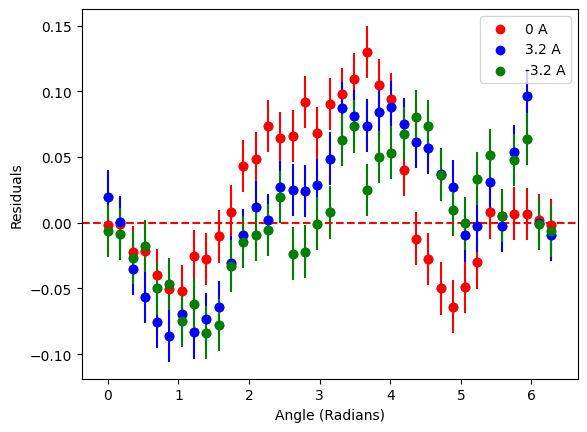

The phase difference between the first and second data sets is 0.11651138653357207 radians or 6.6756107135910545 degrees with an error of ±0.01942833184426676 radians or ±1.1131614176561044 degrees
The phase difference between the first and third data sets is 0.10735695350043084 radians or 6.151100336956917 degrees with an error of ±0.017963864861689226 radians or ±1.029253640318153 degrees
The phase difference between the second and third data sets is -0.00915443303314123 radians or -0.5245103766341374 degrees with an error of ±0.018152430354628133 radians or ±1.0400576472253562 degrees


In [816]:
# Creating a function to fit the data cos^2(theta - phi)
def cos_sq(x, a, b):
    return a * (np.cos(x - b))**2

# Take in better guesses for the parameters based on visual inspection or prior knowledge
guess = [1, 0]  # Adjusted initial guesses for parameters a and b

# Fitting the data using the guesses with increased maxfev
popt7, pcov7 = curve_fit(cos_sq, angle6, Voltage6, p0=guess, maxfev=10000 )
popt8, pcov8 = curve_fit(cos_sq, angle7, Voltage7, p0=guess, maxfev=10000)
popt9, pcov9 = curve_fit(cos_sq, angle8, Voltage8, p0=guess, maxfev=10000)

# Plotting the data
plt.scatter(angle6, Voltage6, color='red', label='0 A')
plt.scatter(angle7, Voltage7, color='blue', label='3.2 A')
plt.scatter(angle8, Voltage8, color='green', label='-3.2 A')
plt.errorbar(angle6, Voltage6, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.errorbar(angle7, Voltage7, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
plt.errorbar(angle8, Voltage8, xerr=errorx_radians, yerr=errory, fmt='o', color='green')

plt.plot(angle6, cos_sq(angle6, *popt7), 'r-')
plt.plot(angle7, cos_sq(angle7, *popt8), 'b-')
plt.plot(angle8, cos_sq(angle8, *popt9), 'g-')

plt.xlabel('Angle (Radians)')
plt.ylabel('Normalized Voltage')
plt.legend()
plt.show()

#Making a residual plot
residuals7 = Voltage6 - cos_sq(angle6, *popt7)
ss_res7 = np.sum(residuals7**2)
ss_tot7 = np.sum((Voltage6 - np.mean(Voltage6))**2)
r_squared7 = 1 - (ss_res7 / ss_tot7)
print('R^2 for the first data set: ', r_squared7)

residuals8 = Voltage7 - cos_sq(angle7, *popt8)
ss_res8 = np.sum(residuals8**2)
ss_tot8 = np.sum((Voltage7 - np.mean(Voltage7))**2)
r_squared8 = 1 - (ss_res8 / ss_tot8)
print('R^2 for the second data set: ', r_squared8)

residuals9 = Voltage8 - cos_sq(angle8, *popt9)
ss_res9 = np.sum(residuals9**2)
ss_tot9 = np.sum((Voltage8 - np.mean(Voltage8))**2)
r_squared9 = 1 - (ss_res9 / ss_tot9)
print('R^2 for the third data set: ', r_squared9)

#Calculate the chi squared
chi_squared7 = np.sum((residuals7 / errory)**2)
chi_squared8 = np.sum((residuals8 / errory)**2)
chi_squared9 = np.sum((residuals9 / errory)**2)

print('Chi squared for the first data set: ', chi_squared7)
print('Chi squared for the second data set: ', chi_squared8)
print('Chi squared for the third data set: ', chi_squared9)

#Calculate the degrees of freedom
dof7 = len(angle6) - 2
dof8 = len(angle7) - 2
dof9 = len(angle8) - 2
print('Degrees of freedom for the first data set: ', dof7)
print('Degrees of freedom for the second data set: ', dof8)
print('Degrees of freedom for the third data set: ', dof9)

#Plot the residuals
plt.scatter(angle6, residuals7, color='red', label='0 A')
plt.errorbar(angle6, residuals7, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.scatter(angle7, residuals8, color='blue', label='3.2 A')
plt.errorbar(angle7, residuals8, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
plt.scatter(angle8, residuals9, color='green', label='-3.2 A')
plt.errorbar(angle8, residuals9, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Angle (Radians)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Calculate the phase shifts in radians and degrees
phase_diff7_rad = popt7[1] - popt8[1]
phase_diff8_rad = popt7[1] - popt9[1]
phase_diff9_rad = popt8[1] - popt9[1]

phase_diff7_deg = np.degrees(phase_diff7_rad)
phase_diff8_deg = np.degrees(phase_diff8_rad)
phase_diff9_deg = np.degrees(phase_diff9_rad)

sigma_b7 = np.sqrt(pcov7[1][1])  # Error in parameter b from first fit
sigma_b8 = np.sqrt(pcov8[1][1])  # Error in parameter b from second fit
sigma_b9 = np.sqrt(pcov9[1][1])  # Error in parameter b from third fit

# Error propagation for the phase differences
sigma_phase_diff7_rad = np.sqrt(sigma_b7**2 + sigma_b8**2)
sigma_phase_diff8_rad = np.sqrt(sigma_b7**2 + sigma_b9**2)
sigma_phase_diff9_rad = np.sqrt(sigma_b8**2 + sigma_b9**2)

# Converting errors from radians to degrees
sigma_phase_diff7_deg = np.degrees(sigma_phase_diff7_rad)
sigma_phase_diff8_deg = np.degrees(sigma_phase_diff8_rad)
sigma_phase_diff9_deg = np.degrees(sigma_phase_diff9_rad)


# Print the phase shifts and their errors
print(f'The phase difference between the first and second data sets is {phase_diff7_rad} radians or {phase_diff7_deg} degrees with an error of ±{sigma_phase_diff7_rad} radians or ±{sigma_phase_diff7_deg} degrees')
print(f'The phase difference between the first and third data sets is {phase_diff8_rad} radians or {phase_diff8_deg} degrees with an error of ±{sigma_phase_diff8_rad} radians or ±{sigma_phase_diff8_deg} degrees')
print(f'The phase difference between the second and third data sets is {phase_diff9_rad} radians or {phase_diff9_deg} degrees with an error of ±{sigma_phase_diff9_rad} radians or ±{sigma_phase_diff9_deg} degrees')


# Air

In [817]:
#Normalize the voltage
Voltage18 = (Voltage18 - np.min(Voltage18)) / (np.max(Voltage18) - np.min(Voltage18))
Voltage16 = (Voltage16 - np.min(Voltage16)) / (np.max(Voltage16) - np.min(Voltage16))
Voltage17 = (Voltage17 - np.min(Voltage17)) / (np.max(Voltage17) - np.min(Voltage17))

#Convert the angles to radians
angle18 = np.radians(angle18)
angle16 = np.radians(angle16)
angle17 = np.radians(angle17)

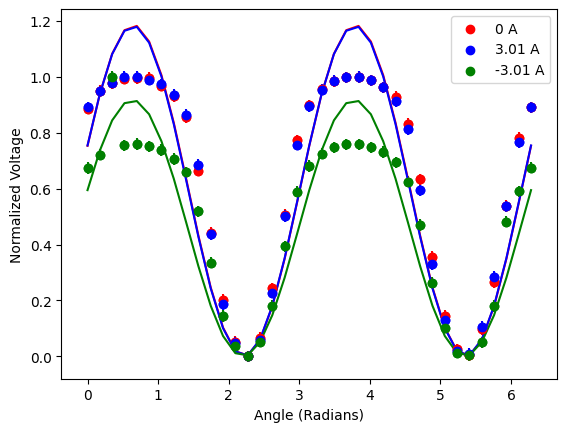

R^2 for the first data set:  0.8609750596376758
R^2 for the second data set:  0.8695630828415322
R^2 for the third data set:  0.8582752872416316
Chi squared for the first data set:  1710.0689794076861
Chi squared for the second data set:  1620.8989916541834
Chi squared for the third data set:  1090.8894319716362
Degrees of freedom for the first data set:  35
Degrees of freedom for the second data set:  35
Degrees of freedom for the third data set:  35


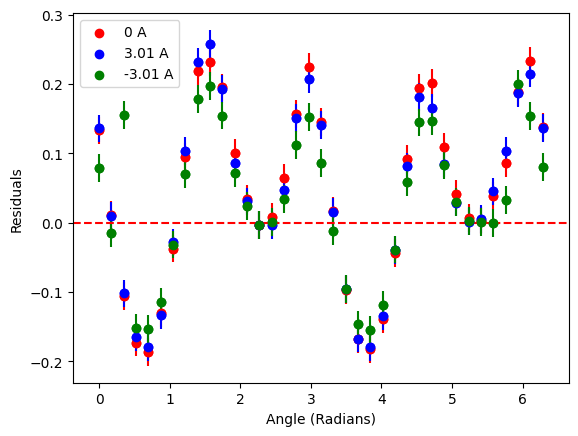

The phase difference between the first and second data sets is 0.0027358904660239602 radians or 0.15675497691325288 degrees with an error of ±0.037904256161949826 radians or ±2.171753903662469 degrees
The phase difference between the first and third data sets is 0.013363568853951513 radians or 0.7656760945639001 degrees with an error of ±0.037904256161949826 radians or ±2.171753903662469 degrees


In [818]:
#Fitting the data
guess = [.8, 6]  # Adjusted initial guesses for parameters a and b
popt10, pcov10 = curve_fit(cos_sq, angle18, Voltage18, p0=guess, maxfev=10000)
popt11, pcov11 = curve_fit(cos_sq, angle16, Voltage16, p0=guess, maxfev=10000)
popt12, pcov12 = curve_fit(cos_sq, angle17, Voltage17, p0=guess, maxfev=10000)

#Plotting the data
plt.scatter(angle18, Voltage18, color='red', label='0 A')
plt.scatter(angle16, Voltage16, color='blue', label='3.01 A')
plt.scatter(angle17, Voltage17, color='green', label='-3.01 A')

plt.errorbar(angle18, Voltage18, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.errorbar(angle16, Voltage16, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
plt.errorbar(angle17, Voltage17, xerr=errorx_radians, yerr=errory, fmt='o', color='green')

plt.plot(angle18, cos_sq(angle18, *popt10), 'r-')
plt.plot(angle16, cos_sq(angle16, *popt11), 'b-')
plt.plot(angle17, cos_sq(angle17, *popt12), 'g-')

plt.xlabel('Angle (Radians)')
plt.ylabel('Normalized Voltage')
plt.legend()

plt.show()

#Making a residual plot
residuals10 = Voltage18 - cos_sq(angle18, *popt10)
ss_res10 = np.sum(residuals10**2)
ss_tot10 = np.sum((Voltage18 - np.mean(Voltage18))**2)
r_squared10 = 1 - (ss_res10 / ss_tot10)
print('R^2 for the first data set: ', r_squared10)

residuals11 = Voltage16 - cos_sq(angle16, *popt11)
ss_res11 = np.sum(residuals11**2)
ss_tot11 = np.sum((Voltage16 - np.mean(Voltage16))**2)
r_squared11 = 1 - (ss_res11 / ss_tot11)
print('R^2 for the second data set: ', r_squared11)

residuals12 = Voltage17 - cos_sq(angle17, *popt12)
ss_res12 = np.sum(residuals12**2)
ss_tot12 = np.sum((Voltage17 - np.mean(Voltage17))**2)

r_squared12 = 1 - (ss_res12 / ss_tot12)
print('R^2 for the third data set: ', r_squared12)

#Calculate the chi squared
chi_squared10 = np.sum((residuals10 / errory)**2)
chi_squared11 = np.sum((residuals11 / errory)**2)
chi_squared12 = np.sum((residuals12 / errory)**2)

print('Chi squared for the first data set: ', chi_squared10)
print('Chi squared for the second data set: ', chi_squared11)
print('Chi squared for the third data set: ', chi_squared12)

#Calculate the degrees of freedom
dof10 = len(angle18) - 2
dof11 = len(angle16) - 2
dof12 = len(angle17) - 2
print('Degrees of freedom for the first data set: ', dof10)

print('Degrees of freedom for the second data set: ', dof11)
print('Degrees of freedom for the third data set: ', dof12)

#Plot the residuals
plt.scatter(angle18, residuals10, color='red', label='0 A')
plt.errorbar(angle18, residuals10, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.scatter(angle16, residuals11, color='blue', label='3.01 A')
plt.errorbar(angle16, residuals11, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')
plt.scatter(angle17, residuals12, color='green', label='-3.01 A')
plt.errorbar(angle17, residuals12, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Angle (Radians)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Calculate the phase shifts in radians and degrees
phase_diff10_rad = popt10[1] - popt11[1]
phase_diff11_rad = popt10[1] - popt12[1]

phase_diff10_deg = np.degrees(phase_diff10_rad)
phase_diff11_deg = np.degrees(phase_diff11_rad)

sigma_b10 = np.sqrt(pcov10[1][1])  # Error in parameter b from first fit
sigma_b11 = np.sqrt(pcov11[1][1])  # Error in parameter b from second fit

# Error propagation for the phase differences
sigma_phase_diff10_rad = np.sqrt(sigma_b10**2 + sigma_b11**2)
sigma_phase_diff11_rad = np.sqrt(sigma_b10**2 + sigma_b11**2)

# Converting errors from radians to degrees
sigma_phase_diff10_deg = np.degrees(sigma_phase_diff10_rad)
sigma_phase_diff11_deg = np.degrees(sigma_phase_diff11_rad)

# Print the phase shifts and their errors
print(f'The phase difference between the first and second data sets is {phase_diff10_rad} radians or {phase_diff10_deg} degrees with an error of ±{sigma_phase_diff10_rad} radians or ±{sigma_phase_diff10_deg} degrees')
print(f'The phase difference between the first and third data sets is {phase_diff11_rad} radians or {phase_diff11_deg} degrees with an error of ±{sigma_phase_diff11_rad} radians or ±{sigma_phase_diff11_deg} degrees')

# Plotting the phase shift

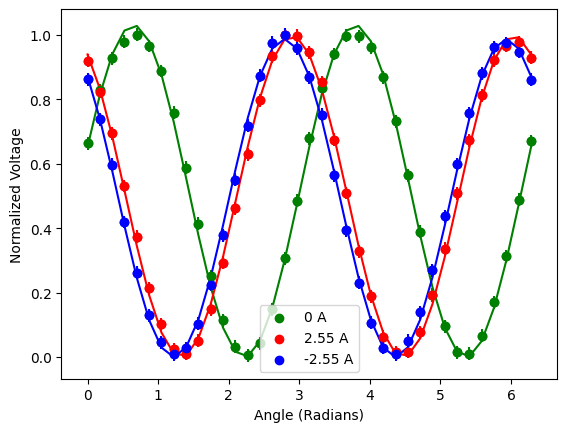

The phase difference between the first and second data sets is 0.8944879496188747 radians or 51.25038433847213 degrees with an error of ±0.00582143338894921 radians or ±0.3335435639033295 degrees
The phase difference between the first and third data sets is 1.0008719882749286 radians or 57.34574076102063 degrees with an error of ±0.005753174280792864 radians or ±0.32963260509264386 degrees
The phase difference between the first and second data sets is 3.047678211274249 radians
The phase difference between the first and second data sets is 3.047678211274249 radians or 12.57661450502806 degrees with an error of ±0.005145446942252005 radians or ±0.29481239349953453 degrees
The phase difference between the first and third data sets is 0.11065871511362757 radians or 6.340277342351396 degrees with an error of ±0.0057902966953262145 radians or ±0.33175956277074 degrees
The phase difference between the second and third data sets is -0.10884461675318902 radians or -6.236337162676664 degrees wit

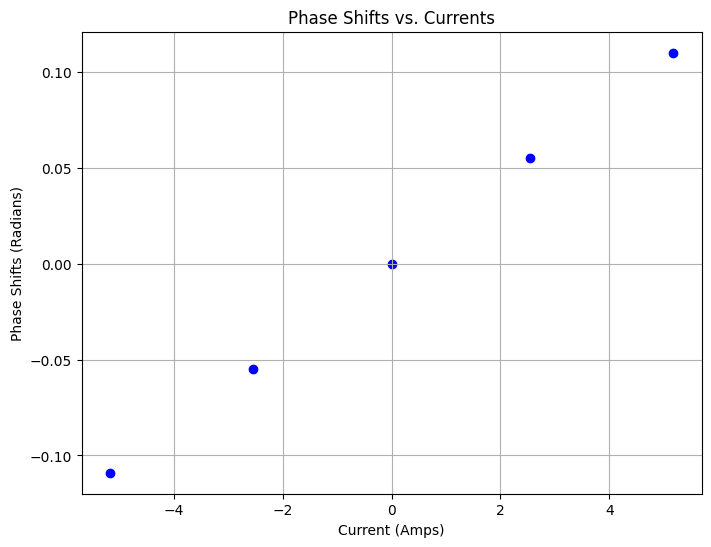

In [819]:
#Grab the phase shifts for the quartz data
#Angle 9 is 0
#2.55 is Anngle 19
#-2.55 is Angle 20

#Convert to radians
angle19 = np.radians(angle19)
angle20 = np.radians(angle20)
#Normalize the voltages
Voltage19 = Voltage19 / np.max(Voltage19) if np.max(Voltage19) != 0 else Voltage19
Voltage20 = Voltage20 / np.max(Voltage20) if np.max(Voltage20) != 0 else Voltage20

#Creating a function to fit the data cos^2(theta - phi)
def cos_sq(x, a, b):
    return a * (np.cos(x - b))**2

#Take in guesses for the parameters
guess = [1, 0]  # Initial guesses for parameters a and b

#Fitting the data using the guesses
popt13, pcov13 = curve_fit(cos_sq, angle9, Voltage9, p0=guess)
popt14, pcov14 = curve_fit(cos_sq, angle19, Voltage19, p0=guess)
popt15, pcov15 = curve_fit(cos_sq, angle20, Voltage20, p0=guess)

#Plotting the data
plt.scatter(angle9, Voltage9, color='green', label='0 A')
plt.scatter(angle19, Voltage19, color='red', label='2.55 A')
plt.scatter(angle20, Voltage20, color='blue', label='-2.55 A')
plt.errorbar(angle9, Voltage9, xerr=errorx_radians, yerr=errory, fmt='o', color='green')
plt.errorbar(angle19, Voltage19, xerr=errorx_radians, yerr=errory, fmt='o', color='red')
plt.errorbar(angle20, Voltage20, xerr=errorx_radians, yerr=errory, fmt='o', color='blue')

plt.plot(angle9, cos_sq(angle9, *popt13), 'g-')
plt.plot(angle19, cos_sq(angle19, *popt14), 'r-')
plt.plot(angle20, cos_sq(angle20, *popt15), 'b-')

plt.xlabel('Angle (Radians)')
plt.ylabel('Normalized Voltage')
plt.legend()
plt.show()


#Calculate the phase shifts and plot the phase shifts
phase_diff13_rad = popt13[1] - popt14[1]
phase_diff14_rad = popt13[1] - popt15[1]
phase_diff15_rad = popt14[1] - popt15[1]

phase_diff13_deg = np.degrees(phase_diff13_rad)
phase_diff14_deg = np.degrees(phase_diff14_rad)
phase_diff15_deg = np.degrees(phase_diff15_rad)

sigma_b13 = np.sqrt(pcov13[1][1])  # Error in parameter b from first fit
sigma_b14 = np.sqrt(pcov14[1][1])  # Error in parameter b from second fit
sigma_b15 = np.sqrt(pcov15[1][1])  # Error in parameter b from third fit

# Error propagation for the phase differences
sigma_phase_diff13_rad = np.sqrt(sigma_b13**2 + sigma_b14**2)
sigma_phase_diff14_rad = np.sqrt(sigma_b13**2 + sigma_b15**2)
sigma_phase_diff15_rad = np.sqrt(sigma_b14**2 + sigma_b15**2)

# Converting errors from radians to degrees
sigma_phase_diff13_deg = np.degrees(sigma_phase_diff13_rad)
sigma_phase_diff14_deg = np.degrees(sigma_phase_diff14_rad)
sigma_phase_diff15_deg = np.degrees(sigma_phase_diff15_rad)

# Print the phase shifts and their errors
print(f'The phase difference between the first and second data sets is {phase_diff13_rad} radians or {phase_diff13_deg} degrees with an error of ±{sigma_phase_diff13_rad} radians or ±{sigma_phase_diff13_deg} degrees')
print(f'The phase difference between the first and third data sets is {phase_diff14_rad} radians or {phase_diff14_deg} degrees with an error of ±{sigma_phase_diff14_rad} radians or ±{sigma_phase_diff14_deg} degrees')
#Cut the phase shifts between the phase_diff13_rad and phase_diff14_rad
phase_diff1_rad= (57.34574076102063- 51.25038433847213)/2
print(f'The phase difference between the first and second data sets is {phase_diff1_rad} radians')

# Print the phase shifts and their errors
print(f'The phase difference between the first and second data sets is {phase_diff1_rad} radians or {phase_diff1_deg} degrees with an error of ±{sigma_phase_diff1_rad} radians or ±{sigma_phase_diff1_deg} degrees')
print(f'The phase difference between the first and third data sets is {phase_diff2_rad} radians or {phase_diff2_deg} degrees with an error of ±{sigma_phase_diff2_rad} radians or ±{sigma_phase_diff2_deg} degrees')
print(f'The phase difference between the second and third data sets is {phase_diff3_rad} radians or {phase_diff3_deg} degrees with an error of ±{sigma_phase_diff3_rad} radians or ±{sigma_phase_diff3_deg} degrees')

phase_shifts = [0.11, -0.109, 0, 0.055, -0.055]
currents = [5.18, -5.18, 0, 2.55, -2.55]

# Plotting the phase shifts against currents
plt.figure(figsize=(8, 6))
plt.scatter(currents, phase_shifts, color='blue')
plt.title('Phase Shifts vs. Currents')
plt.xlabel('Current (Amps)')
plt.ylabel('Phase Shifts (Radians)')
plt.grid(True)
plt.show()


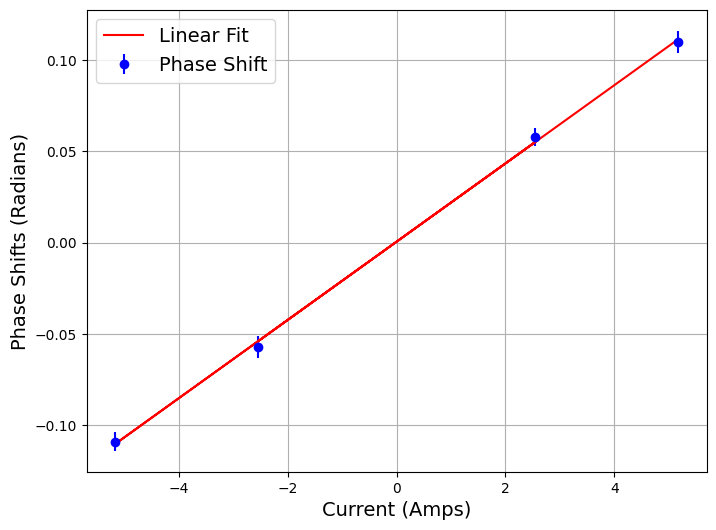

The slope of the linear fit is 0.02141 with an error of ±0.00040
The intercept of the linear fit is 0.00050 with an error of ±0.00161
Chi squared for the linear fit: 0.7053111212105205
Degrees of freedom for the linear fit: 3


In [829]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Updated data provided by the user
phase_shifts = [0.11, -0.109, 0.058, -0.057]
currents = [5.18, -5.18, 2.55, -2.55]
errors = [0.006, 0.005, 0.005, 0.006]  # Errors for each data point

# Define the linear model function
def linear(x, m, b):
    return m * x + b

# Fit the linear model to the data
popt, pcov = curve_fit(linear, currents, phase_shifts, p0=[0, 0], maxfev=10000)

# Calculate the slope and intercept of the linear fit
slope = popt[0]
intercept = popt[1]

# Calculate the errors in the slope and intercept
sigma_slope = np.sqrt(pcov[0][0])
sigma_intercept = np.sqrt(pcov[1][1])

# Plotting the phase shifts against currents with error bars for the phase shifts
plt.figure(figsize=(8, 6))
plt.errorbar(currents, phase_shifts, yerr=errors, fmt='o', color='blue', label='Phase Shift')
plt.plot(currents, linear(np.array(currents), *popt), 'r-', label='Linear Fit')

plt.xlabel('Current (Amps)', fontsize=14)
plt.ylabel('Phase Shifts (Radians)', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

# Print the slope and intercept with their errors
print(f'The slope of the linear fit is {slope:.5f} with an error of ±{sigma_slope:.5f}')
print(f'The intercept of the linear fit is {intercept:.5f} with an error of ±{sigma_intercept:.5f}')

# Calculate the chi squared for this fit
residuals = np.array(phase_shifts) - linear(np.array(currents), *popt)
chi_squared = np.sum((residuals / errors)**2)
dof = len(currents) - 1  # Degrees of freedom: number of data points minus number of fitted parameters
print('Chi squared for the linear fit:', chi_squared)
print('Degrees of freedom for the linear fit:', dof)
